# rdkit 操作分子对象



In [6]:
from rdkit import Chem
from rdkit.Chem import Draw

## 获取分子中的原子

In [24]:
smi='C1CCCCCC1'
mol = Chem.MolFromSmiles(smi)

atoms = mol.GetAtoms()
atoms_num = mol.GetNumAtoms()

print(atoms)  # <rdkit.Chem.rdchem._ROAtomSeq object at 0x1050ddc10>
print(atoms[0])  # <rdkit.Chem.rdchem.Atom object at 0x10aa13760>
print('类型=',type(atoms))  # 类型= <class 'rdkit.Chem.rdchem._ROAtomSeq'>
print('类型0=',type(atoms[0]))  # 类型0= <class 'rdkit.Chem.rdchem.Atom'>
print("省略氢的原子数=",atoms_num)



类型= <class 'rdkit.Chem.rdchem._ROAtomSeq'>
类型0= <class 'rdkit.Chem.rdchem.Atom'>
省略氢的原子数= 7


## 获取原子的坐标信息
> 注：前提，导入的原子必须带有坐标信息

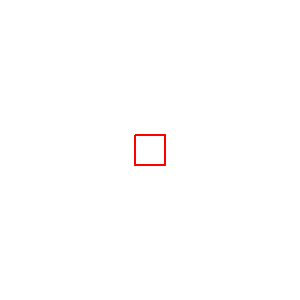

In [8]:
mol = Chem.MolFromPDBFile("./data/single.pdb")
Draw.MolToImage(mol)

In [9]:
print(mol.GetConformer().GetAtomPosition(1)[0])
print(mol.GetConformer().GetAtomPosition(1).x)
print(mol.GetConformer().GetAtomPosition(1).y)
print(mol.GetConformer().GetAtomPosition(1).z)
x,y,z = mol.GetConformer().GetAtomPosition(1)
print(x,y,z)
xyz = list(mol.GetConformer().GetAtomPosition(3))
print(xyz)


0.0
0.0
0.0
0.0
0.0 0.0 0.0
[0.0, 0.0, 0.0]


## 访问单个原子的信息
访问原子信息可能用到的函数
- `mol.GetAtoms()`：对原子进行遍历
- `GetIdx()`：获取原子索引
- `GetAtomicNum()`：获取原子序号
- `GetSymbol()`：获取原子符号
- `GetDegree()`：获取原子连接数（受H是否隐藏影响）
- `GetTotalDegree()`：获取原子总连接数（与H是否隐藏无关）
- `GetFormalCharge()`：获取原子形式电荷
- `GetHybridization()`: 获取原子杂化方式
- `GetExplicitValence()`: 获取原子显式化合价
- `GetImplicitValence()`: 获取原子隐式化合价
- `GetTotalValence()`：获取原子总的化合价


In [10]:
atom = mol.GetAtomWithIdx(0)
print("标签=", atom.GetSymbol()) #  C
print("原子显式化合价=", atom.GetExplicitValence()) # 4
print("原子隐式化合价=", atom.GetImplicitValence()) # 4
print("原子总的化合价=", atom.GetTotalValence()) # 4
print("原子元素周期编号=", atom.GetAtomicNum())  # 6

print("杂化类型=", atom.GetHybridization()) # 返回杂化类型   杂化类型= SP3
print("是否在芳香烃内=", atom.GetIsAromatic()) # 该原子是否在芳香烃内   是否在芳香烃内= False

# 与该原子连接的氢原子个数
print("该原子连接的氢原子个数=", atom.GetTotalNumHs()) #  该原子连接的氢原子个数= 3

# 返回该原子的所有邻居原子，以元祖的形式返回
neighbors = atom.GetNeighbors() 
print([x.GetAtomicNum() for x in neighbors])  #[6]


标签= C
原子显式化合价= 3
原子隐式化合价= 1
原子总的化合价= 4
原子元素周期编号= 6
杂化类型= SP2
是否在芳香烃内= False
该原子连接的氢原子个数= 1
[6, 6]


## 访问所有原子

In [11]:
print('\t'.join(['id', 'num', 'exp','symbol', 'degree', 'charge', 'hybrid']))
for at in atoms:
    print(at.GetIdx(), end='\t')
    print(at.GetAtomicNum(), end='\t')
    print(at.GetExplicitValence(), end='\t')
    print(at.GetSymbol(), end='\t')
    print(at.GetDegree(), end='\t')
    print(at.GetFormalCharge(), end='\t')
    print(at.GetHybridization())


id	num	exp	symbol	degree	charge	hybrid
0	6	2	C	2	0	SP3
1	6	2	C	2	0	SP3
2	6	2	C	2	0	SP3
3	6	2	C	2	0	SP3
4	6	2	C	2	0	SP3
5	6	2	C	2	0	SP3
6	6	2	C	2	0	SP3


## 分子中的键操作

In [12]:
bonds = mol.GetBonds()
print(bonds)
print(type(bonds))
print(bonds[0])
print(type(bonds[0]))

<class 'rdkit.Chem.rdchem._ROBondSeq'>
<class 'rdkit.Chem.rdchem.Bond'>


### 获取键的信息
获取分子中键的信息所能用到的函数
- `m.GetBonds()`: 对键进行遍历
- `GetIdx()`: 获取键的索引
- `GetBondType()`: 获取键的类型
- `GetBondTypeAsDouble()`: 以数字形式显示键的类型
- `GetIsAromatic()`: 是否为芳香键
- `GetIsConjugated()`: 是否为共轭键
- `IsInRing()`: 是否在环中
- `IsInRingSize(n)`: 是否在n元环中
- `GetBeginAtom()`: 获取起始原子
- `GetEndAtom()`: 获取末尾原子

In [14]:
bonds = mol.GetBonds()  # 对键进行遍历
print(type(bonds))

print('\t'.join(['id', 'type', 'double', 'aromic', 'conjug', 'ring', 'begin', 'end']))
for bond in bonds:
    print(bond.GetIdx(), end='\t')
    print(bond.GetBondType(), end='\t')
    print(bond.GetBondTypeAsDouble(), end='\t')
    print(bond.GetIsAromatic(), end='\t')
    print(bond.GetIsConjugated(), end='\t')
    print(bond.IsInRing(), end='\t')
    print(bond.GetBeginAtomIdx(), end='\t')
    print(bond.GetEndAtomIdx())


<class 'rdkit.Chem.rdchem._ROBondSeq'>
id	type	double	aromic	conjug	ring	begin	end
0	SINGLE	1.0	False	True	True	0	7
1	DOUBLE	2.0	False	True	True	0	1
2	SINGLE	1.0	False	True	True	1	2
3	DOUBLE	2.0	False	True	True	2	3
4	SINGLE	1.0	False	True	True	3	4
5	DOUBLE	2.0	False	True	True	4	5
6	SINGLE	1.0	False	True	True	5	6
7	DOUBLE	2.0	False	True	True	6	7


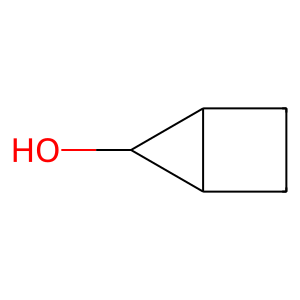

In [15]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
Draw.MolToImage(m)

In [16]:
#  ‘IsInRingSize(n)’：判断是否在n-元环上
atom2  = m.GetAtomWithIdx(2)
print("atom2 in ring:", atom2.IsInRing())
print("atom2 in 3-ring:", atom2.IsInRingSize(3))
print("atom2 in 4-ring:", atom2.IsInRingSize(4))
print("atom2 in 5-ring:", atom2.IsInRingSize(5))

atom2 in ring: True
atom2 in 3-ring: True
atom2 in 4-ring: True
atom2 in 5-ring: False


In [17]:
## 获取分子中所有的环 GetSymmSSSR(m)
ssr = Chem.GetSymmSSSR(m)
num_ring = len(ssr)
print("num of ring", num_ring)
for ring in ssr:
    print("ring consisted of atoms id:",list(ring))


num of ring 2
ring consisted of atoms id: [1, 2, 3]
ring consisted of atoms id: [4, 5, 2, 3]


## 获取分子中所有的环
获取分子环信息用到的函数
- `GetRingInfo()`: 直接获取环的信息
- `NumRings()`: 查看一共有几个环
- `NumAtomRings()`: 查看原子在几个环中
- `IsAtomInRingOfSize(n, n1)`: 查看id为n的原子是否在n1元环中
- `IsBondInRingOfSize(n , n1)`: 查看id为n的键是否在n1元环中

In [18]:
# 获取分子中环的信息 GetRingInfo()
ri = m.GetRingInfo()
dir(ri)

['AddRing',
 'AreAtomsInSameRing',
 'AreAtomsInSameRingOfSize',
 'AreBondsInSameRing',
 'AreBondsInSameRingOfSize',
 'AreRingFamiliesInitialized',
 'AtomMembers',
 'AtomRingFamilies',
 'AtomRingSizes',
 'AtomRings',
 'BondMembers',
 'BondRingFamilies',
 'BondRingSizes',
 'BondRings',
 'IsAtomInRingOfSize',
 'IsBondInRingOfSize',
 'MinAtomRingSize',
 'MinBondRingSize',
 'NumAtomRings',
 'NumBondRings',
 'NumRelevantCycles',
 'NumRingFamilies',
 'NumRings',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [23]:
ri = mol.GetRingInfo()
print('分子中环的个数=',ri.NumRings())  # 分子中环的个数= 3
print(ri.NumAtomRings(2))  # 0
print(ri.IsAtomInRingOfSize(3,3))  # False
print(ri.IsBondInRingOfSize(2,3))  # False

print(ri.AtomRings()) # 过滤大环分子
print(ri.AtomMembers(1))

分子中环的个数= 1
1
False
False
((0, 1, 2, 3, 4, 5, 6, 7),)
(0,)


In [20]:
# 通过索引获取键 SINGLE
print('通过索引获取键', mol.GetBondWithIdx(3).GetBondType())  

通过索引获取键 DOUBLE
